PCA是一种无监督的数据降维方法，LDA是一种有监督的数据降维方法。LDA在进行数据降维的时候利用数据的列别标签提供的信息。  
PCA和LDA都是将数据投影到新的相互正交的坐标轴上，只不过在投影的时候约束（也可说是目标）是不同的。  
PCA将数据投影到方法最大的几个相互正交的方向上，以期待保留最多的样本信息。样本的方差越大表示样本的多样性越好。在训练模型的时候，我们当然希望数据的差别越大越好。否则即使样本很多但是他们彼此相似或者相同，提供的样本信息将相同，相当于只有很少的样本提供信息是有用的。样本信息不足将导致模型性能不够理想。这就是PCA降维的目标：将数据投影到方差最大的几个相互正交的方向上。

LDA的思想可以用一句话来概括“投影后类内方差最小，类间方法最大”。我们要将数据在低维度上进行投影，投影后希望每一种类别数据的投影点尽可能的接近，而不同类别的数据的类别中心之间的距离尽可能的大。

In [1]:
import os
import sys
import numpy as np
import operator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 构造数据
group1 = np.random.random((8,2))*5+20
group2 = np.random.random((8,2))*5+2

In [4]:
group2

array([[ 2.45104624,  2.15878335],
       [ 3.5410994 ,  2.99302171],
       [ 6.03355906,  2.82150458],
       [ 6.25068248,  3.06545401],
       [ 6.05697543,  5.93630641],
       [ 5.12154892,  3.79075884],
       [ 4.71877884,  6.12404899],
       [ 4.19140491,  3.1205358 ]])

In [5]:
group1

array([[ 20.50029594,  20.79929591],
       [ 20.40051067,  23.27010805],
       [ 23.58110158,  22.44462386],
       [ 20.35066766,  21.55881074],
       [ 24.14751832,  24.01173976],
       [ 20.24258429,  22.45327825],
       [ 22.78927107,  23.8773502 ],
       [ 23.10762488,  21.09968438]])

In [6]:
# 加标签
X1 = group1
y1 = np.ones((8,1))
X0 = group2
y0 = np.zeros((8,1))

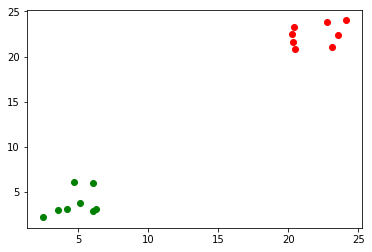

In [7]:
plt.scatter(X1[:,0],X1[:,1],c='r')
plt.scatter(X0[:,0],X0[:,1],c='g')

In [9]:
# 得到每一组的平均值  u1 u0
mean1 = np.array([np.mean(X1[:,0]), np.mean(X1[:,1])])
mean0 = np.array([np.mean(X0[:,0]), np.mean(X0[:,1])])

In [10]:
# sw类内散度矩阵， 

from numpy import mat
m1 = np.shape(X1)[0]
sw = np.zeros(shape=(2,2))
for i in range(m1):
    xsmean = mat(X1[i,:] - mean1)
    sw += xsmean.transpose() * xsmean

m0 = np.shape(X0)[0]
for i in range(m1):
    xsmean = mat(X0[i,:] - mean0)
    sw += xsmean.transpose() * xsmean
    
    
# 对于 二分类 LDA来说 w为如下
w=(mean0-mean1)*(mat(sw).I)

In [11]:
w

matrix([[-0.32878492, -0.58426386]])

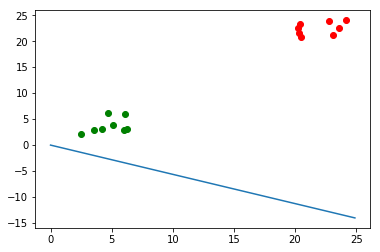

In [12]:
# 画图投影直线
plt.scatter(X1[:,0],X1[:,1],c='r')
plt.scatter(X0[:,0],X0[:,1],c='g')
x=np.arange(0,25,0.1)
y=np.array((-w[0,0]*x)/w[0,1])
plt.plot(x,y)